# Libraries and Random state

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import cvxopt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import imageio
import os
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GaussianNoise
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score , classification_report, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib.colors import ListedColormap
student_number = 40204584
RS = student_number % 100
RS

84

# سوال 1

## آ

Load dataset

In [ ]:
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
df = pd.DataFrame(data, columns=feature_names)
df['target'] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
dimensions = df.shape
num_samples = len(df)
dimensions, num_samples

((150, 5), 150)

In [ ]:
means = df.mean()
print("Means:")
means

Means:


sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

In [ ]:
variances = df.var()
print("Variances:\n")
variances

Variances:



sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64

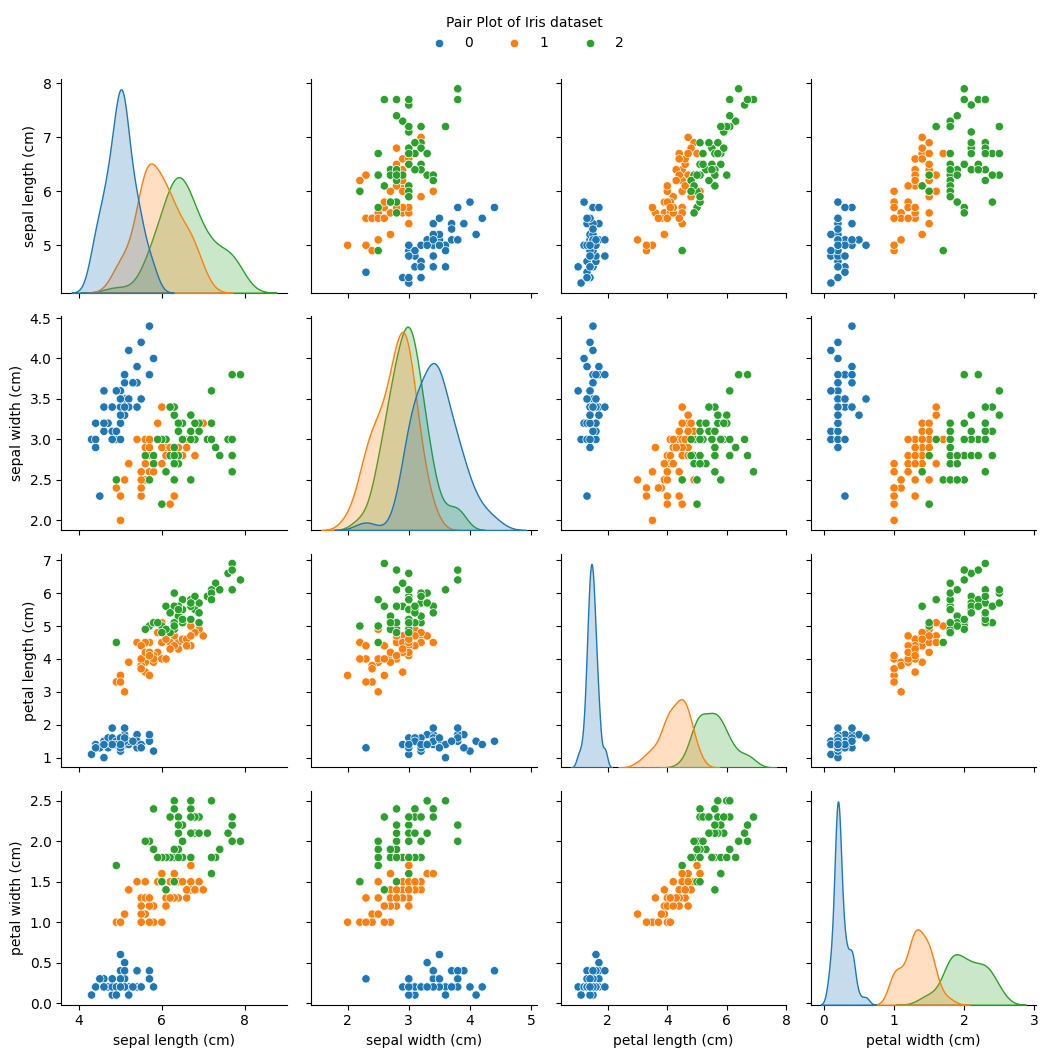

In [ ]:
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
ax = sns.pairplot(df, hue='target', palette=custom_palette)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title="Pair Plot of Iris dataset", frameon=False
)
plt.tight_layout()
plt.show()

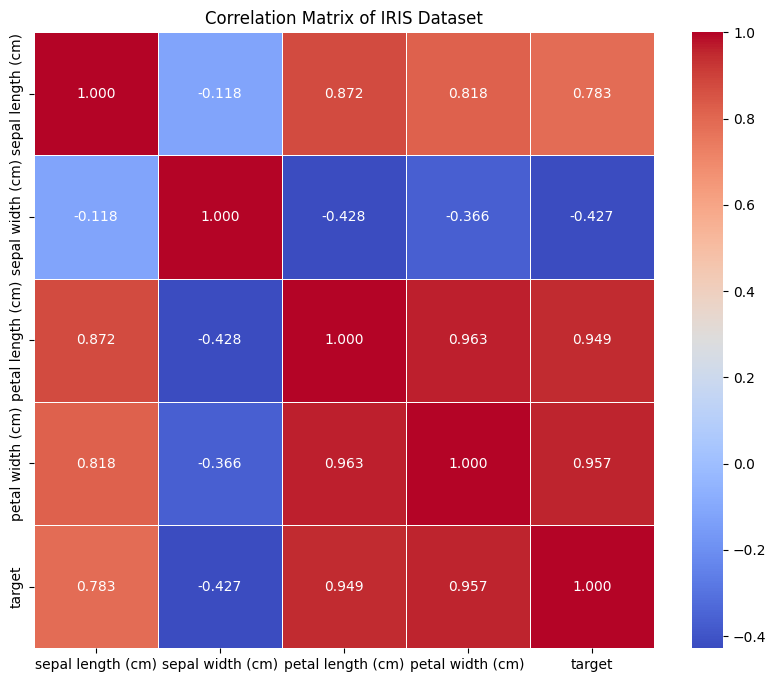

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".3f")
plt.title('Correlation Matrix of IRIS Dataset')
plt.show()


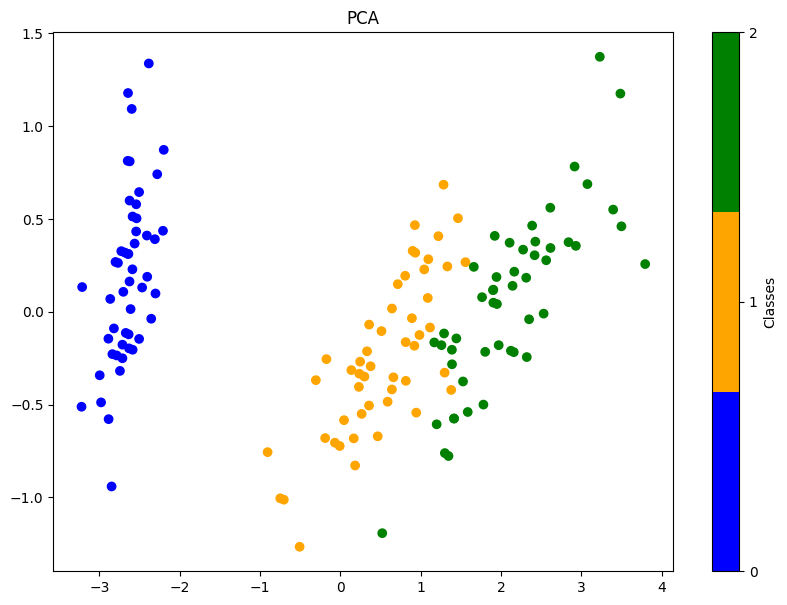

In [ ]:
pca = PCA(n_components=2, random_state = RS)
pca_result = pca.fit_transform(data)
custom_colors = ['blue', 'orange', 'green']
custom_cmap = ListedColormap(custom_colors)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target, cmap=custom_cmap, marker='o')
cbar = plt.colorbar(scatter, ticks=[0, 1, 2], label='Classes')
cbar.ax.set_yticklabels(['0', '1', '2'])
plt.title('PCA')
plt.show()

## ب

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



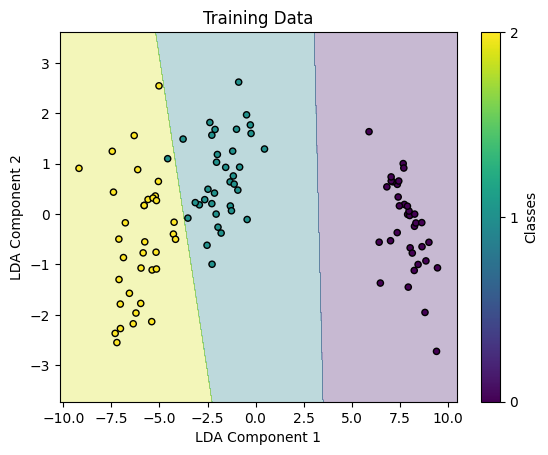

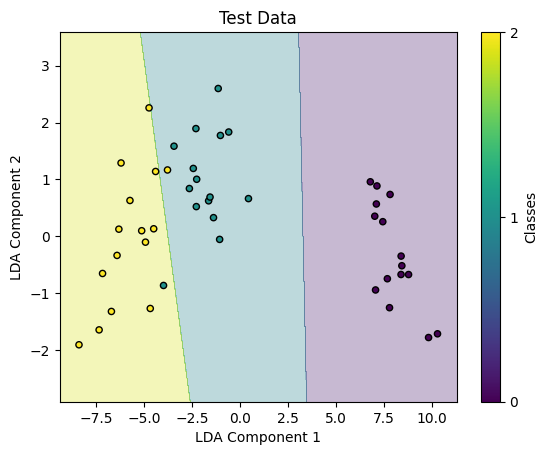

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=RS, stratify=target)

scalar = StandardScaler()
scalar.fit_transform(X_train)
scalar.fit(X_test)

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

svm = SVC(kernel='linear')
svm.fit(X_train_lda, y_train)
y_test_pred = svm.predict(X_test_lda)
print(classification_report(y_test, y_test_pred, target_names=target_names))

def plot_decision_boundaries(X, y, model, title='Decision Boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
    plt.title(title)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.show()

plot_decision_boundaries(X_train_lda, y_train, svm, title='Training Data')

plot_decision_boundaries(X_test_lda, y_test, svm, title='Test Data')

## ج

In [ ]:
results = []
images = []

def plot_decision_boundaries_and_save(X, y, model, degree, dataset_type='Training'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
    plt.title(f'Degree {degree}, {dataset_type} Data')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    filename = f'Degree_{degree}_{dataset_type}.png'
    plt.savefig(filename)
    plt.close()
    return filename

for degree in range(1, 11):
    svm_poly = SVC(kernel='poly', degree=degree)
    svm_poly.fit(X_train_lda, y_train)
    y_test_pred = svm_poly.predict(X_test_lda)

    accuracy = accuracy_score(y_test, y_test_pred)
    results.append((degree, accuracy))

    train_plot_file = plot_decision_boundaries_and_save(X_train_lda, y_train, svm_poly, degree, dataset_type='Training')
    images.append(imageio.imread(train_plot_file))

    test_plot_file = plot_decision_boundaries_and_save(X_test_lda, y_test, svm_poly, degree, dataset_type='Test')
    images.append(imageio.imread(test_plot_file))

gif_filename = 'decision_boundaries.gif'
imageio.mimsave(gif_filename, images, duration=1000)

for degree, accuracy in results:
    print(f'Degree: {degree}, Accuracy: {accuracy:.2f}')


<ipython-input-73-78838f163089>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(train_plot_file))
<ipython-input-73-78838f163089>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(test_plot_file))
<ipython-input-73-78838f163089>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(train_plot_file))

Degree: 1, Accuracy: 0.96
Degree: 2, Accuracy: 0.89
Degree: 3, Accuracy: 0.98
Degree: 4, Accuracy: 0.87
Degree: 5, Accuracy: 0.91
Degree: 6, Accuracy: 0.80
Degree: 7, Accuracy: 0.87
Degree: 8, Accuracy: 0.71
Degree: 9, Accuracy: 0.84
Degree: 10, Accuracy: 0.73


## د

In [ ]:
class SVM(object):
    def __init__(self, kernel='polynomial', C=0, gamma=1, degree=3):
        self.C = float(C)
        self.gamma = float(gamma)
        self.degree = int(degree)
        self.kernel = kernel

    def polynomial_kernel(self, x, y, C=1, d=3):
        return (np.dot(x, y) + C) ** d

    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.polynomial_kernel(X[i], X[j], self.C, self.degree)

        P = cvxopt.matrix(np.outer(y, y) * K + 1e+5 * np.identity(n_samples))
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y.astype(np.double), (1, n_samples), tc='d')
        b = cvxopt.matrix(0.0)

        if self.C == 0:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        cvxopt.solvers.options['show_progress'] = False
        cvxopt.solvers.options['abstol'] = 1e-10
        cvxopt.solvers.options['reltol'] = 1e-10
        cvxopt.solvers.options['feastol'] = 1e-10

        try:
            solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        except ValueError as e:
            print("Solver failed due to rank deficiency.")
            return False

        alphas = np.ravel(solution['x'])

        sv = alphas > 1e-10
        ind = np.arange(len(alphas))[sv]
        self.alphas = alphas[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        if len(self.alphas) > 0:
            self.b = 0
            for n in range(len(self.alphas)):
                self.b += self.sv_y[n]
                self.b -= np.sum(self.alphas * self.sv_y * K[ind[n], sv])
            self.b = self.b / len(self.alphas)
        else:
            self.b = 0

        if self.kernel == 'linear':
            self.w = np.zeros(n_features)
            for n in range(len(self.alphas)):
                self.w += self.alphas[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
        return True

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.alphas, self.sv_y, self.sv):
                    s += a * sv_y * self.polynomial_kernel(X[i], sv, self.C, self.degree)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

In [ ]:
def plotSVC(X, y, models, degree, dataset_type='Training'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)

    Z = np.zeros((xx.ravel().shape[0], len(models)))
    for i, model in enumerate(models):
        Z[:, i] = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
    plt.title(f'Degree {degree}, {dataset_type} Data')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    filename = f'_Degree_{degree}_{dataset_type}.png'
    plt.savefig(filename)
    plt.close()
    return filename

In [ ]:
results = []
images = []

for degree in range(1, 11):
    svm_models = []

    for i in range(len(target_names)):
        y_train_binary = np.where(y_train == i, 1, -1)
        svm = SVM(kernel='polynomial', degree=degree, C=1.0)
        svm.fit(X_train_lda, y_train_binary)
        svm_models.append(svm)

    filename = plotSVC(X_train_lda, y_train, svm_models, degree, 'Training')
    images.append(imageio.imread(filename))
    filename = plotSVC(X_test_lda, y_test, svm_models, degree, 'Testing')
    images.append(imageio.imread(filename))

    y_test_pred = np.zeros(len(y_test))

    for i in range(len(target_names)):
        y_test_pred_binary = svm_models[i].predict(X_test_lda)
        y_test_pred[y_test_pred_binary == 1] = i

    accuracy = accuracy_score(y_test, y_test_pred)
    results.append((degree, accuracy))

for degree, accuracy in results:
    print(f'Degree: {degree}, Accuracy: {accuracy:.2f}')

gif_filename = 'decision_boundaries2.gif'
imageio.mimsave(gif_filename, images, duration=1000)

<ipython-input-81-393abef85c6b>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-81-393abef85c6b>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-81-393abef85c6b>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-81-3

Degree: 1, Accuracy: 0.33
Degree: 2, Accuracy: 0.62
Degree: 3, Accuracy: 0.93
Degree: 4, Accuracy: 0.93
Degree: 5, Accuracy: 0.91
Degree: 6, Accuracy: 0.91
Degree: 7, Accuracy: 0.84
Degree: 8, Accuracy: 0.20
Degree: 9, Accuracy: 0.33
Degree: 10, Accuracy: 0.33


# سوال 3

## ج

In [ ]:
!gdown 124_jH5kuOfoVdfFpV9qav4kVXYcuoliz
data = pd.read_csv('creditcard.csv')

Downloading...
From (original): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz
From (redirected): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz&confirm=t&uuid=b23f7fa8-142f-4e12-9ecc-5be14623fb0d
To: /content/creditcard.csv
100% 151M/151M [00:04<00:00, 33.0MB/s]


In [ ]:
# Handle missing values (if any)
data = data.dropna()
# Normalize the Amount Feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
# Split the data into features and labels
features = data.drop(['Class'], axis=1)
labels = data['Class']
features = features.drop(['Time'] , axis = 1)
# Chech how many classes are in Labels
labels.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=RS)

# Oversample the training data using SMOTE
smote = SMOTE(random_state=RS)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
y_train_resampled.value_counts()

Class
0    227441
1       404
Name: count, dtype: int64


Class
0    227441
1    227441
Name: count, dtype: int64

In [ ]:
# Denoising Autoencoder
dae = Sequential([
    GaussianNoise(0.1, input_shape=(X_train_resampled.shape[1],)),
    Dense(29, activation='relu'),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(15, activation='relu'),
    Dense(22, activation='relu'),
    Dense(29, activation='relu')
])
dae.compile(optimizer='adam', loss='mse')

# Train the DAE
dae.fit(X_train_resampled, X_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
])

# Get the denoised output
X_train_denoised = dae.predict(X_train_resampled)

Epoch 1/100
1422/1422 [==============================] - 8s 4ms/step - loss: 9.2891 - val_loss: 22.8575
Epoch 2/100
1422/1422 [==============================] - 4s 3ms/step - loss: 9.1201 - val_loss: 22.8299
Epoch 3/100
1422/1422 [==============================] - 6s 4ms/step - loss: 9.0865 - val_loss: 22.7866
Epoch 4/100
1422/1422 [==============================] - 5s 4ms/step - loss: 9.0635 - val_loss: 22.7698
Epoch 5/100
1422/1422 [==============================] - 4s 3ms/step - loss: 9.0523 - val_loss: 22.7640
Epoch 6/100
1422/1422 [==============================] - 5s 4ms/step - loss: 9.0471 - val_loss: 22.7614
Epoch 7/100
1422/1422 [==============================] - 6s 4ms/step - loss: 9.0431 - val_loss: 22.7580
Epoch 8/100
1422/1422 [==============================] - 6s 4ms/step - loss: 9.0399 - val_loss: 22.7553
Epoch 9/100
1422/1422 [==============================] - 6s 4ms/step - loss: 9.0373 - val_loss: 22.7501
Epoch 10/100
1422/1422 [==============================] - 4s 3ms

In [ ]:
# One-hot encode the labels for the classifier (only once)
y_train_resampled_one_hot = tf.keras.utils.to_categorical(y_train_resampled, num_classes=2)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Classifier
classifier = Sequential([
    Dense(29, input_shape=(X_train_denoised.shape[1],), activation='relu'),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model checkpoints
checkpoint = ModelCheckpoint(filepath='best_model', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the classifier
history = classifier.fit(X_train_denoised, y_train_resampled_one_hot, epochs=100, batch_size=256, validation_split=0.2, callbacks=[checkpoint, early_stopping])


Epoch 1/100
1422/1422 [==============================] - 6s 4ms/step - loss: 0.1186 - accuracy: 0.9589 - val_loss: 0.1021 - val_accuracy: 0.9597
Epoch 2/100
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0484 - accuracy: 0.9826 - val_loss: 0.0551 - val_accuracy: 0.9819
Epoch 3/100
1422/1422 [==============================] - 5s 3ms/step - loss: 0.0376 - accuracy: 0.9867 - val_loss: 0.0429 - val_accuracy: 0.9858
Epoch 4/100
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0316 - accuracy: 0.9890 - val_loss: 0.0392 - val_accuracy: 0.9867
Epoch 5/100
1422/1422 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9906 - val_loss: 0.0288 - val_accuracy: 0.9916
Epoch 6/100
1422/1422 [==============================] - 4s 3ms/step - loss: 0.0252 - accuracy: 0.9915 - val_loss: 0.0428 - val_accuracy: 0.9843
Epoch 7/100
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.0218 - val_ac

In [ ]:
# Load the saved model
model = load_model('best_model')

# Iterate through the layers and display their weights
for layer in model.layers:
    print(f"Layer name: {layer.name}")
    print(f"Weights: {layer.get_weights()}")
    print("="*50)

Layer name: dense_45
Weights: [array([[-1.55258417e-01, -1.64393857e-02,  1.70311332e-01,
        -2.30536815e-02,  3.54288340e-01,  9.20708477e-02,
         2.00138584e-01,  1.98748648e-01,  4.35910851e-01,
        -9.52537581e-02,  2.43108645e-01, -4.21991289e-01,
         3.23546827e-01, -7.42965639e-02, -2.05501169e-02,
        -1.20041108e+00,  3.20135981e-01, -1.00527108e-01,
        -2.96525121e-01,  2.97303140e-01, -1.30966946e-01,
         3.77163768e-01, -2.92837620e-02, -1.59194022e-01,
         9.90340412e-02,  2.34890655e-01, -2.35256061e-01,
         7.19235167e-02,  2.93413699e-01],
       [ 2.89394051e-01,  4.50288147e-01,  2.77684778e-01,
         1.03829645e-01,  9.88110676e-02,  6.51802868e-02,
        -4.12543148e-01, -2.65540242e-01,  1.37225655e-03,
         3.96432072e-01,  9.14613309e-04,  3.46740961e-01,
         6.86816052e-02, -3.85100096e-01, -2.88310856e-01,
         5.27671635e-01,  8.21968094e-02, -1.08887263e-01,
        -7.46446326e-02,  3.14410508e-01,

## د

1781/1781 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56874
           1       0.14      0.89      0.25        88

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962

Precision: 0.1449814126394052
Recall: 0.8863636363636364
F1 Score: 0.24920127795527156


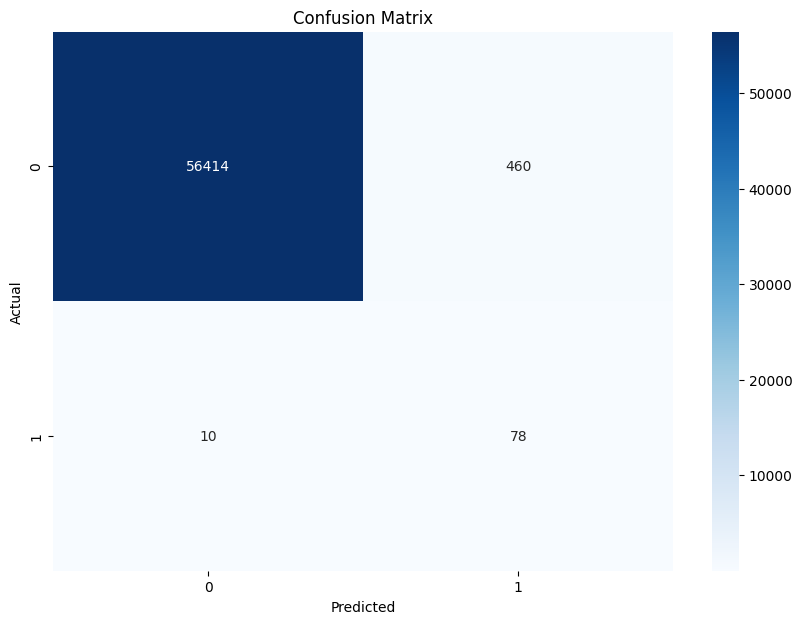

In [ ]:
# Get the denoised output
X_test_denoised = dae.predict(X_test)
# Evaluate the model on the test set
y_pred_proba = classifier.predict(X_test_denoised)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print( accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ه

In [ ]:
!gdown 124_jH5kuOfoVdfFpV9qav4kVXYcuoliz

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Handle missing values (if any)
data = data.dropna()

# Normalize only the "Amount" feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data into features and labels
features = data.drop(['Class'], axis=1)
labels = data['Class']

features = features.drop(['Time'] , axis = 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=RS)

smote = SMOTE( random_state=RS)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Store results
#ratios = [0.2, 0.3, 0.4, 0.5 , .6]
#recall_scores = []
#accuracy_scores = []


    # Denoising Autoencoder
dae = Sequential([
     GaussianNoise(0.1, input_shape=(X_train_resampled.shape[1],)),
    Dense(29, activation='relu'),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(15, activation='relu'),
    Dense(22, activation='relu'),
     Dense(29, activation='relu')
])
dae.compile(optimizer='adam', loss='mse')

    # Train the DAE
dae.fit(X_train_resampled, X_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
])

    # Get the denoised output
X_train_denoised = dae.predict(X_train_resampled)
X_test_denoised = dae.predict(X_test)

    # One-hot encode the labels for the classifier
y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled, num_classes=2)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)

    # Classifier
classifier = Sequential([
    Dense(29, input_shape=(X_train_denoised.shape[1],), activation='relu'),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
    ])
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Model checkpoints
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

    # Train the classifier
classifier.fit(X_train_denoised, y_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[checkpoint, early_stopping])



Downloading...
From (original): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz
From (redirected): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz&confirm=t&uuid=bcfbce8e-45d6-4313-87e7-3be0b6605e18
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 125MB/s]
Epoch 1/100
1422/1422 [==============================] - 7s 3ms/step - loss: 9.2767 - val_loss: 22.8826
Epoch 2/100
1422/1422 [==============================] - 6s 5ms/step - loss: 9.1201 - val_loss: 22.8661
Epoch 3/100
1422/1422 [==============================] - 6s 4ms/step - loss: 9.1058 - val_loss: 22.8637
Epoch 4/100
1422/1422 [==============================] - 4s 3ms/step - loss: 9.0963 - val_loss: 22.8566
Epoch 5/100
1422/1422 [==============================] - 4s 3ms/step - loss: 9.0819 - val_loss: 22.8478
Epoch 6/100
1422/1422 [==============================] - 6s 4ms/step - loss: 9.0656 - val_loss: 22.7819
Epoch 7/100
1422/1422 [==============================] - 4s 3ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1422/1422 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9842 - val_loss: 0.0586 - val_accuracy: 0.9777
Epoch 3/100
1422/1422 [==============================] - 4s 3ms/step - loss: 0.0355 - accuracy: 0.9874 - val_loss: 0.0289 - val_accuracy: 0.9901
Epoch 4/100
1422/1422 [==============================] - 4s 3ms/step - loss: 0.0315 - accuracy: 0.9890 - val_loss: 0.0387 - val_accuracy: 0.9862
Epoch 5/100
1422/1422 [==============================] - 5s 3ms/step - loss: 0.0286 - accuracy: 0.9903 - val_loss: 0.0198 - val_accuracy: 0.9945
Epoch 6/100
1422/1422 [==============================] - 3s 2ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0114 - val_accuracy: 0.9975
Epoch 7/100
1422/1422 [==============================] - 3s 2ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0214 - val_accuracy: 0.9944
Epoch 8/100
1422/1422 [==============================] - 5s 4ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0389 - val_accuracy: 0.98

1781/1781 [==============================] - 3s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


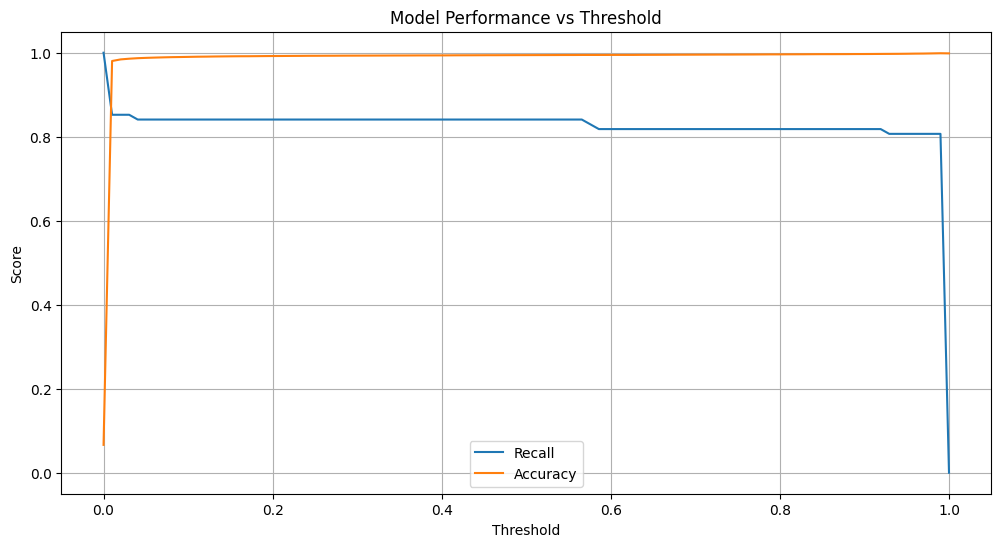

In [ ]:
# Define a function to calculate metrics at different thresholds
def evaluate_thresholds(model, X_test, y_test, thresholds):
    recall_scores = []
    accuracy_scores = []
    precision_scores = []
    f1_scores = []

    y_pred_proba = model.predict(X_test_denoised)

    for threshold in thresholds:
        y_pred = (y_pred_proba[:, 1] > threshold).astype(int)  # Get binary predictions for the positive class
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        f1_scores.append(f1)

    return recall_scores, accuracy_scores, precision_scores, f1_scores

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Assuming the classifier model is already trained and available as 'classifier'
recall_scores, accuracy_scores, precision_scores, f1_scores = evaluate_thresholds(classifier, X_test_denoised, y_test, thresholds)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Model Performance vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

Downloading...
From (original): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz
From (redirected): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz&confirm=t&uuid=d3a9d497-41da-447c-ae5c-b85018ac2124
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 128MB/s]
Epoch 1/100
853/853 [==============================] - 4s 3ms/step - loss: 0.8977 - val_loss: 20.3332
Epoch 2/100
853/853 [==============================] - 2s 3ms/step - loss: 0.8109 - val_loss: 19.6628
Epoch 3/100
853/853 [==============================] - 3s 3ms/step - loss: 0.7885 - val_loss: 19.8585
Epoch 4/100
853/853 [==============================] - 4s 4ms/step - loss: 0.7710 - val_loss: 19.5912
Epoch 5/100
853/853 [==============================] - 2s 3ms/step - loss: 0.7613 - val_loss: 19.6082
Epoch 6/100
853/853 [==============================] - 2s 3ms/step - loss: 0.7556 - val_loss: 19.5367
Epoch 7/100
853/853 [==============================] - 2s 3ms/step - loss: 0.7519 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


853/853 [==============================] - 2s 2ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 1.4971 - val_accuracy: 0.8172
Epoch 3/100
853/853 [==============================] - 2s 2ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 1.1829 - val_accuracy: 0.8349
Epoch 4/100
853/853 [==============================] - 3s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 1.0428 - val_accuracy: 0.8349
Epoch 5/100
853/853 [==============================] - 3s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 1.1130 - val_accuracy: 0.8237
Epoch 6/100
853/853 [==============================] - 2s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.8737 - val_accuracy: 0.8374
Epoch 7/100
853/853 [==============================] - 2s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 1.0167 - val_accuracy: 0.8288
Epoch 8/100
853/853 [==============================] - 2s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.8757 - val_accuracy: 0.8401
Epoch 9/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


924/924 [==============================] - 2s 2ms/step - loss: 0.0414 - accuracy: 0.9934 - val_loss: 0.8469 - val_accuracy: 0.8498
Epoch 3/100
924/924 [==============================] - 3s 3ms/step - loss: 0.0321 - accuracy: 0.9939 - val_loss: 0.5151 - val_accuracy: 0.9021
Epoch 4/100
924/924 [==============================] - 4s 4ms/step - loss: 0.0253 - accuracy: 0.9942 - val_loss: 0.3962 - val_accuracy: 0.9039
Epoch 5/100
924/924 [==============================] - 2s 3ms/step - loss: 0.0208 - accuracy: 0.9945 - val_loss: 0.3791 - val_accuracy: 0.8861
Epoch 6/100
924/924 [==============================] - 2s 2ms/step - loss: 0.0181 - accuracy: 0.9949 - val_loss: 0.3232 - val_accuracy: 0.9000
Epoch 7/100
924/924 [==============================] - 2s 2ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.3098 - val_accuracy: 0.8991
Epoch 8/100
924/924 [==============================] - 3s 3ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.2710 - val_accuracy: 0.9131
Epoch 9/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


996/996 [==============================] - 2s 2ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.2819 - val_accuracy: 0.8897
Epoch 3/100
996/996 [==============================] - 4s 4ms/step - loss: 0.0413 - accuracy: 0.9859 - val_loss: 0.1854 - val_accuracy: 0.9210
Epoch 4/100
996/996 [==============================] - 2s 2ms/step - loss: 0.0358 - accuracy: 0.9875 - val_loss: 0.1702 - val_accuracy: 0.9315
Epoch 5/100
996/996 [==============================] - 3s 3ms/step - loss: 0.0325 - accuracy: 0.9886 - val_loss: 0.1647 - val_accuracy: 0.9307
Epoch 6/100
996/996 [==============================] - 3s 3ms/step - loss: 0.0301 - accuracy: 0.9893 - val_loss: 0.1730 - val_accuracy: 0.9300
Epoch 7/100
996/996 [==============================] - 3s 3ms/step - loss: 0.0281 - accuracy: 0.9901 - val_loss: 0.1637 - val_accuracy: 0.9403
Epoch 8/100
996/996 [==============================] - 4s 4ms/step - loss: 0.0272 - accuracy: 0.9905 - val_loss: 0.1143 - val_accuracy: 0.9618
Epoch 9/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1067/1067 [==============================] - 3s 3ms/step - loss: 0.0463 - accuracy: 0.9832 - val_loss: 0.0822 - val_accuracy: 0.9709
Epoch 3/100
1067/1067 [==============================] - 4s 4ms/step - loss: 0.0350 - accuracy: 0.9876 - val_loss: 0.0987 - val_accuracy: 0.9669
Epoch 4/100
1067/1067 [==============================] - 3s 2ms/step - loss: 0.0292 - accuracy: 0.9897 - val_loss: 0.1012 - val_accuracy: 0.9623
Epoch 5/100
1067/1067 [==============================] - 3s 2ms/step - loss: 0.0266 - accuracy: 0.9910 - val_loss: 0.0779 - val_accuracy: 0.9724
Epoch 6/100
1067/1067 [==============================] - 3s 3ms/step - loss: 0.0249 - accuracy: 0.9914 - val_loss: 0.0791 - val_accuracy: 0.9743
Epoch 7/100
1067/1067 [==============================] - 4s 3ms/step - loss: 0.0232 - accuracy: 0.9918 - val_loss: 0.0372 - val_accuracy: 0.9885
Epoch 8/100
1067/1067 [==============================] - 3s 3ms/step - loss: 0.0222 - accuracy: 0.9923 - val_loss: 0.0777 - val_accuracy: 0.97

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1138/1138 [==============================] - 4s 4ms/step - loss: 0.0446 - accuracy: 0.9838 - val_loss: 0.0866 - val_accuracy: 0.9700
Epoch 3/100
1138/1138 [==============================] - 3s 3ms/step - loss: 0.0347 - accuracy: 0.9874 - val_loss: 0.0824 - val_accuracy: 0.9713
Epoch 4/100
1138/1138 [==============================] - 3s 3ms/step - loss: 0.0302 - accuracy: 0.9892 - val_loss: 0.0585 - val_accuracy: 0.9823
Epoch 5/100
1138/1138 [==============================] - 3s 2ms/step - loss: 0.0267 - accuracy: 0.9906 - val_loss: 0.0899 - val_accuracy: 0.9666
Epoch 6/100
1138/1138 [==============================] - 3s 3ms/step - loss: 0.0247 - accuracy: 0.9913 - val_loss: 0.0400 - val_accuracy: 0.9882
Epoch 7/100
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0234 - accuracy: 0.9917 - val_loss: 0.0560 - val_accuracy: 0.9797
Epoch 8/100
1138/1138 [==============================] - 3s 3ms/step - loss: 0.0216 - accuracy: 0.9924 - val_loss: 0.0479 - val_accuracy: 0.98

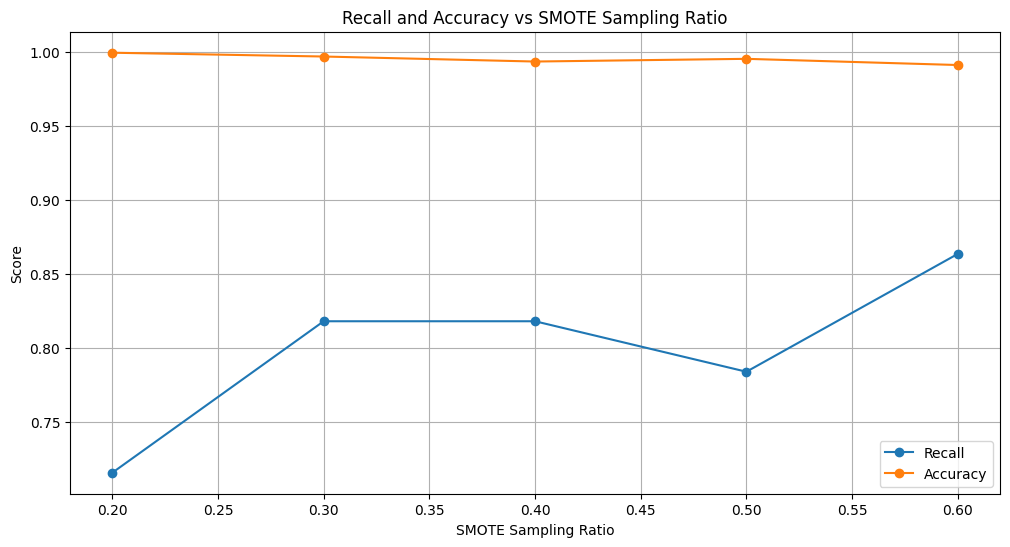

In [ ]:
!gdown 124_jH5kuOfoVdfFpV9qav4kVXYcuoliz

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Handle missing values (if any)
data = data.dropna()

# Normalize only the "Amount" feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data into features and labels
features = data.drop(['Class'], axis=1)
labels = data['Class']

features = features.drop(['Time'] , axis = 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=RS)


# Store results
ratios = [0.2, 0.3, 0.4, 0.5 , .6]
recall_scores = []
accuracy_scores = []

for ratio in ratios:
    # Apply SMOTE with different ratios
    smote = SMOTE(sampling_strategy=ratio, random_state=RS)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


    # Denoising Autoencoder
    dae = Sequential([
        GaussianNoise(0.1, input_shape=(X_train_resampled.shape[1],)),
        Dense(29, activation='relu'),
        Dense(22, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='relu'),
        Dense(15, activation='relu'),
        Dense(22, activation='relu'),
        Dense(29, activation='relu')
])
    dae.compile(optimizer='adam', loss='mse')

    # Train the DAE
    dae.fit(X_train_resampled, X_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
])

    # Get the denoised output
    X_train_denoised = dae.predict(X_train_resampled)
    X_test_denoised = dae.predict(X_test)

    # One-hot encode the labels for the classifier
    y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled, num_classes=2)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)

    # Classifier
    classifier = Sequential([
        Dense(29, input_shape=(X_train_denoised.shape[1],), activation='relu'),
        Dense(22, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(2, activation='softmax')
    ])
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Model checkpoints
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

    # Train the classifier
    classifier.fit(X_train_denoised, y_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[checkpoint, early_stopping])


    # Evaluate the model on the test set
    y_pred_proba = classifier.predict(X_test_denoised)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Calculate metrics
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    recall_scores.append(recall)
    accuracy_scores.append(accuracy)

# Plot Recall and Accuracy
plt.figure(figsize=(12, 6))
plt.plot(ratios, recall_scores, label='Recall', marker='o')
plt.plot(ratios, accuracy_scores, label='Accuracy', marker='o')
plt.xlabel('SMOTE Sampling Ratio')
plt.ylabel('Score')
plt.title('Recall and Accuracy vs SMOTE Sampling Ratio')
plt.legend()
plt.grid(True)
plt.show()


## و

In [ ]:
!gdown 124_jH5kuOfoVdfFpV9qav4kVXYcuoliz

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Handle missing values (if any)
data = data.dropna()

# Normalize only the "Amount" feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data into features and labels
features = data.drop(['Class'], axis=1)
labels = data['Class']

features = features.drop(['Time'] , axis = 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=RS)




    # One-hot encode the labels for the classifier
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Classifier
classifier = Sequential([
    Dense(29, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model checkpoints
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the classifier
history = classifier.fit(X_train,y_train_one_hot, epochs=100, batch_size=256, validation_split=0.2, callbacks=[checkpoint, early_stopping])




Downloading...
From (original): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz
From (redirected): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz&confirm=t&uuid=88d17523-b990-455b-bc01-5f85f55c2424
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 98.3MB/s]
Epoch 1/100
713/713 [==============================] - 3s 3ms/step - loss: 0.0324 - accuracy: 0.9925 - val_loss: 0.0050 - val_accuracy: 0.9991
Epoch 2/100
 74/713 [==>...........................] - ETA: 1s - loss: 0.0046 - accuracy: 0.9992

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


713/713 [==============================] - 2s 3ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 3/100
713/713 [==============================] - 2s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 4/100
713/713 [==============================] - 2s 3ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 5/100
713/713 [==============================] - 3s 4ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 6/100
713/713 [==============================] - 2s 3ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 7/100
713/713 [==============================] - 2s 3ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 8/100
713/713 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 9/100

1781/1781 [==============================] - 3s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


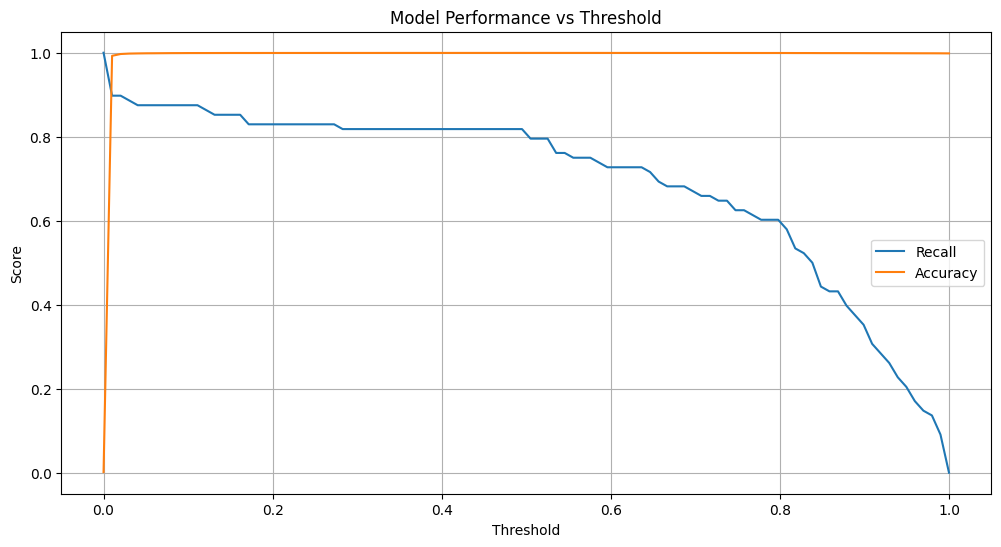

In [ ]:
# Define a function to calculate metrics at different thresholds
def evaluate_thresholds(model, X_test, y_test, thresholds):
    recall_scores = []
    accuracy_scores = []
    precision_scores = []
    f1_scores = []

    y_pred_proba = model.predict(X_test)

    for threshold in thresholds:
        y_pred = (y_pred_proba[:, 1] > threshold).astype(int)  # Get binary predictions for the positive class
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        f1_scores.append(f1)

    return recall_scores, accuracy_scores, precision_scores, f1_scores

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Assuming the classifier model is already trained and available as 'classifier'
recall_scores, accuracy_scores, precision_scores, f1_scores = evaluate_thresholds(classifier, X_test, y_test, thresholds)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Model Performance vs Threshold')
plt.legend()
plt.grid(True)
plt.show()
